# <p style="color:blue"> Stanford University Machine Learning Course

This notebook contains the all the assignments (originally done in Matlab) converted to python

## Week 2 (ex1): Linear Regression


In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Create a 5x5 identity matrix

In [232]:
A = np.identity(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 2. Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. This script has already been set up to load this data for you.

In [233]:
data= pd.read_csv("ex1data1.txt",header = None,names = ['population', 'profit'])
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


### 2.1 Plotting the data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.

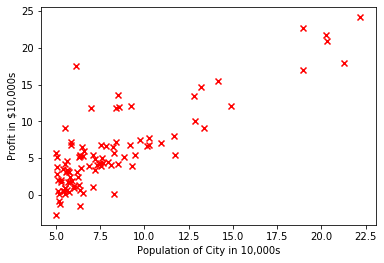

In [234]:
x = data.population
y = data.profit
plt.scatter(x,y,c = 'red',marker = 'x')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

### 2.2 Gradient Descent
In this section, you will fit the linear regression parameters to our dataset using gradient descent.

### 2.2.1 Update Equations
The objective of linear regression is to minimize the cost function

where the hypothesis  is given by the linear model

Recall that the parameters of your model are the  values. These are the values you will adjust to minimize cost . One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

With each step of gradient descent, your parameters  come closer to the optimal values that will achieve the lowest cost .

Implementation Note: We store each example as a row in the the X matrix in MATLAB. To take into account the intercept term (), we add an additional first column to X and set it to all ones. This allows us to treat  as simply another 'feature'.

### 2.2.2 Implementation
In this script, we have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the  intercept term. Run the code below to initialize the parameters to 0 and the learning rate alpha to 0.01. 

In [235]:
data.insert(0,'x0',1)       # Add a column of ones to x
data

,x0,population,profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [ ]:
X_df = data.iloc[:,0:2]    #create a dataframe from columns 'x0' and 'population'
X = X_df.to_numpy()        #create a numpy array from the X_df dataframe
y_df = data.iloc[:,2]      #create a dataframe from price colummn
y = y_df.to_numpy().reshape(97,1)        #create a numpy array from y_df dataframe and reshape it into a 97x1 array



### Calculate the Cost Function J

In [ ]:
def computeCost(X, y, theta):
    m = len(X)
    Error = (X.dot(theta) - y)
    sqError = np.power(Error,2) 
    J = 1/(2*m) * np.sum(sqError)
    return J

### Sample values

In [285]:
m = len(X)                 # number of training examples
theta = np.zeros((2,1))    # initialize fitting parameters
iterations = 1500;
alpha = 0.01

a = computeCost(X,y,theta)

### Calculate Theta using Gradient Desccent

In [286]:
def gradientDescent(X,y,theta,alpha,num_iters):
    #GRADIENTDESCENT Performs gradient descent to learn theta
    #theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    #taking num_iters gradient steps with learning rate alpha
    #Initialize some useful values
    
    m = len(y)         #number of training examples
    for iter in range(num_iters):
        sum_error_1 = 1/m * np.sum(X.dot(theta)-y)
        sum_error_2 = 1/m * ( np.sum( (X.dot(theta)-y) * X[:,1].reshape(97,1) ) )
        temp1 = theta[0] - (alpha * sum_error_1)
        temp2 = theta[1] - (alpha * sum_error_2)
        theta = np.array([temp1,temp2])
        
    return theta

In [287]:
theta = gradientDescent(X, y, theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])